In [1]:
import lsst.daf.butler
import lsst.afw.display

import astropy.visualization as aviz
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import lsst.afw.display as afwDisplay

afwDisplay.setDefaultBackend('firefly')

In [22]:
dataset = "cosmos"
collection="ap_verify-output"
base_path = "/sdf/group/rubin/user/parejko/scratch/ap_verify_runs/"
butler_main = lsst.daf.butler.Butler(f"{base_path}{dataset}-main/repo", collections=collection)
butler_new = lsst.daf.butler.Butler(f"{base_path}{dataset}-40507/repo", collections=collection)

In [23]:
dataids = list(butler_main.registry.queryDataIds(("visit", "detector"), datasets="initial_stars_footprints_detector"))
print("Number of exposures:", len(dataids))
display = lsst.afw.display.Display()

Number of exposures: 10


In [24]:
science = butler_main.get("initial_pvi", dataids[0])
difference = butler_main.get("goodSeeingDiff_differenceTempExp", dataids[0])
diaSrc_main = butler_main.get("goodSeeingDiff_diaSrc", dataids[0])
diaSrc_new = butler_new.get("goodSeeingDiff_diaSrc", dataids[0])

In [25]:
dipoles_main = diaSrc_main['ip_diffim_DipoleFit_flag_classification'] & ~diaSrc_main['sky_source']
dipoles_new = diaSrc_new['ip_diffim_DipoleFit_flag_classification'] & ~diaSrc_new['sky_source']
sky_main = diaSrc_main['sky_source']
sky_new = diaSrc_new['sky_source']

In [26]:
display.frame = 0
display.image(science)
display.frame = 1
display.image(difference)

In [28]:
# plot source centroids for dipole and non-dipole sources
display.erase()
display.centroids(diaSrc_main[dipoles_main], symbol="x", size=10, ctype="red")
display.centroids(diaSrc_new[dipoles_new], symbol="+", size=10, ctype="green")
display.centroids(diaSrc_main[~dipoles_main], symbol="x", size=10, ctype="yellow")
display.centroids(diaSrc_new[~dipoles_new], symbol="+", size=10, ctype="cyan")

In [29]:
# compare naive and fit lobe centroids

display.erase()
with display.Buffering():
    for record_main, record_new in zip(diaSrc_main[dipoles_main], diaSrc_new[dipoles_new]):
        display.dot("x", record_main['ip_diffim_NaiveDipoleCentroid_pos_x'], record_main['ip_diffim_NaiveDipoleCentroid_pos_y'], ctype="red")
        display.dot("x", record_main['ip_diffim_NaiveDipoleCentroid_neg_x'], record_main['ip_diffim_NaiveDipoleCentroid_neg_y'], ctype="yellow")
        display.dot("+", record_new['ip_diffim_DipoleFit_pos_x'], record_new['ip_diffim_DipoleFit_pos_y'], ctype="green")
        display.dot("+", record_new['ip_diffim_DipoleFit_neg_x'], record_new['ip_diffim_DipoleFit_neg_y'], ctype="cyan")


In [21]:
# compare fit lobe centroids in old and new processing: no difference

display.erase()
with display.Buffering():
    for record_main, record_new in zip(diaSrc_main[dipoles_main], diaSrc_new[dipoles_new]):
        # records with nans messes up
        display.dot("x", record_main['ip_diffim_DipoleFit_pos_centroid_x'], record_main['ip_diffim_DipoleFit_pos_centroid_y'], ctype="red")
        display.dot("x", record_main['ip_diffim_DipoleFit_neg_centroid_x'], record_main['ip_diffim_DipoleFit_neg_centroid_y'], ctype="yellow")
        display.dot("+", record_new['ip_diffim_DipoleFit_pos_x'], record_new['ip_diffim_DipoleFit_pos_y'], ctype="green")
        display.dot("+", record_new['ip_diffim_DipoleFit_neg_x'], record_new['ip_diffim_DipoleFit_neg_y'], ctype="cyan")


In [19]:
display.erase()
with display.Buffering():
    display.dot("x", 200, 200, ctype='blue', size=500)

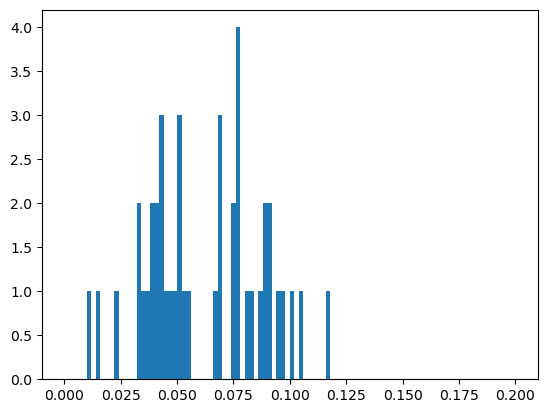

In [55]:
plt.hist(diaSrc_new['ip_diffim_DipoleFit_separation'], bins=100, range=[0,.2]);

In [64]:
names = [name for x in diaSrc_new.schema if "DipoleFit" in (name := x.getField().getName())]

In [68]:
for x in diaSrc_new[dipoles_new]:
    print()
    print(x['id'])
    for name in names:
        print(name, x[name])


527736141479149571
ip_diffim_DipoleFit_pos_instFlux 1003623.0430839129
ip_diffim_DipoleFit_pos_instFluxErr 10355.91408889409
ip_diffim_DipoleFit_neg_instFlux -1003623.0430839129
ip_diffim_DipoleFit_neg_instFluxErr 10355.91408889409
ip_diffim_DipoleFit_instFlux 1003623.0430839129
ip_diffim_DipoleFit_instFluxErr nan
ip_diffim_DipoleFit_pos_x 396.24119411306566
ip_diffim_DipoleFit_pos_y 44.50000977259483
ip_diffim_DipoleFit_neg_x 396.2901847608568
ip_diffim_DipoleFit_neg_y 44.559350199065236
ip_diffim_DipoleFit_x 396.2656894369612
ip_diffim_DipoleFit_y 44.52967998583003
ip_diffim_DipoleFit_xErr nan
ip_diffim_DipoleFit_yErr nan
ip_diffim_DipoleFit_orientation -129.54261630445578
ip_diffim_DipoleFit_separation 0.0769504371961859
ip_diffim_DipoleFit_chi2dof 24192.576473941626
ip_diffim_DipoleFit_nData 2184
ip_diffim_DipoleFit_signalToNoise 10355.91408889409
ip_diffim_DipoleFit_flag_classification True
ip_diffim_DipoleFit_flag_classificationAttempted True
ip_diffim_DipoleFit_flag False
ip_di

In [49]:
diaSrc_new['ip_diffim_DipoleFit_separation']

array([       nan,        nan, 0.07695044,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan, 0.09148472,        nan, 0.04089123,
       0.08314486,        nan,        nan,        nan, 0.07407985,
              nan, 0.07521265, 0.100806  , 0.08959044, 0.06873483,
       0.0779202 ,        nan, 0.09160354,        nan,        nan,
       0.09494384, 0.09676652, 5.08886988, 0.07629497, 0.07652115,
              nan, 0.05199044, 0.11799835,        nan,        nan,
              nan,        nan,        nan,        nan, 0.05055393,
              nan, 0.04275486,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan, 0.03366662,        nan,
       0.06834123,        nan,        nan, 0.03746273,        nan,
              nan,        nan,        nan, 0.08881503, 0.05496

In [50]:
diaSrc_new['ip_diffim_DipoleFit_neg_x'] - diaSrc_new['ip_diffim_DipoleFit_pos_x']

array([        nan,         nan,  0.04899065,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,  0.05938755,         nan,  0.02058541,
        0.06132337,         nan,         nan,         nan,  0.05575817,
               nan,  0.07213281,  0.0883658 ,  0.08022409,  0.06851956,
        0.074093  ,         nan,  0.07875513,         nan,         nan,
        0.08298045,  0.0842275 ,  5.        ,  0.07275137,  0.07652115,
               nan,  0.04754007,  0.11353455,         nan,         nan,
               nan,         nan,         nan,         nan,  0.05029226,
               nan,  0.02413582,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan, -0.02919857,         nan,
       -0.06816262,         nan,         nan, -0.03729871,      

In [18]:
diaSrc.schema

Schema(
    (Field['L'](name="id", doc="unique ID"), Key<L>(offset=0, nElements=1)),
    (Field['Angle'](name="coord_ra", doc="position in ra/dec"), Key<Angle>(offset=8, nElements=1)),
    (Field['Angle'](name="coord_dec", doc="position in ra/dec"), Key<Angle>(offset=16, nElements=1)),
    (Field['L'](name="parent", doc="unique ID of parent source"), Key<L>(offset=24, nElements=1)),
    (Field['F'](name="coord_raErr", doc="1-sigma uncertainty on ra", units="rad"), Key<F>(offset=32, nElements=1)),
    (Field['F'](name="coord_decErr", doc="1-sigma uncertainty on dec", units="rad"), Key<F>(offset=36, nElements=1)),
    (Field['F'](name="coord_ra_dec_Cov", doc="uncertainty covariance between ra and dec", units="rad rad"), Key<F>(offset=40, nElements=1)),
    (Field['Flag'](name="flags_negative", doc="set if source was detected as significantly negative"), Key['Flag'](offset=48, bit=0)),
    (Field['I'](name="deblend_nChild", doc="Number of children this object has (defaults to 0)"), Key<I>